# 14장. 텐서플로의 구조 자세히 알아보기

In [1]:
%load_ext watermark
%watermark -u -d -v -p numpy,tensorflow,matplotlib

/home/haesun/anaconda3/envs/python-ml/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


last updated: 2019-03-17 

CPython 3.7.2
IPython 7.3.0

numpy 1.16.1
tensorflow 2.0.0-alpha0
matplotlib 3.0.2


In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

## 텐서플로의 랭크와 텐서

**텐서의 랭크와 크기를 확인하는 방법**

In [3]:
## t1, t2, t3 텐서를 정의합니다.
t1 = tf.constant(np.pi)
t2 = tf.constant([1, 2, 3, 4])
t3 = tf.constant([[1, 2], [3, 4]])

## 랭크를 구합니다.
r1 = tf.rank(t1)
r2 = tf.rank(t2)
r3 = tf.rank(t3)

## 크기를 구합니다
s1 = t1.get_shape()
s2 = t2.get_shape()
s3 = t3.get_shape()
print('크기:', s1, s2, s3)

print('랭크:', 
      r1.numpy(), 
      r2.numpy(), 
      r3.numpy())

크기: () (4,) (2, 2)
랭크: 0 1 2


## 텐서를 다차원 배열로 변환하기

In [4]:
arr = np.array([[1., 2., 3., 3.5],
                [4., 5., 6., 6.5],
                [7., 8., 9., 9.5]])
T1 = tf.constant(arr)
print(T1)
s = T1.get_shape()
print('T1의 크기:', s)
print('T1의 크기:', T1.shape)
T2 = tf.Variable(np.random.normal(size=s))
print(T2)
T3 = tf.Variable(np.random.normal(size=s[0]))
print(T3)

tf.Tensor(
[[1.  2.  3.  3.5]
 [4.  5.  6.  6.5]
 [7.  8.  9.  9.5]], shape=(3, 4), dtype=float64)
T1의 크기: (3, 4)
T1의 크기: (3, 4)
<tf.Variable 'Variable:0' shape=(3, 4) dtype=float64, numpy=
array([[-0.35251485,  2.43632864,  0.67549699,  1.16200915],
       [ 0.7455268 ,  0.78344929,  1.97996343, -0.38213976],
       [-0.09027442, -0.78588721,  1.02617218,  0.42983251]])>
<tf.Variable 'Variable:0' shape=(3,) dtype=float64, numpy=array([ 0.14342177, -0.43741184, -0.89294293])>


In [5]:
T4 = tf.reshape(T1, shape=[1, 1, -1])
print(T4)
T5 = tf.reshape(T1, shape=[1, 3, -1])
print(T5)

tf.Tensor([[[1.  2.  3.  3.5 4.  5.  6.  6.5 7.  8.  9.  9.5]]], shape=(1, 1, 12), dtype=float64)
tf.Tensor(
[[[1.  2.  3.  3.5]
  [4.  5.  6.  6.5]
  [7.  8.  9.  9.5]]], shape=(1, 3, 4), dtype=float64)


In [6]:
T6 = tf.transpose(T5, perm=[2, 1, 0])
print(T6)
T7 = tf.transpose(T5, perm=[0, 2, 1])
print(T7)

tf.Tensor(
[[[1. ]
  [4. ]
  [7. ]]

 [[2. ]
  [5. ]
  [8. ]]

 [[3. ]
  [6. ]
  [9. ]]

 [[3.5]
  [6.5]
  [9.5]]], shape=(4, 3, 1), dtype=float64)
tf.Tensor(
[[[1.  4.  7. ]
  [2.  5.  8. ]
  [3.  6.  9. ]
  [3.5 6.5 9.5]]], shape=(1, 4, 3), dtype=float64)


In [7]:
t5_splt = tf.split(T5, 
                   num_or_size_splits=2, 
                   axis=2)
print(t5_splt)

[<tf.Tensor: id=46, shape=(1, 3, 2), dtype=float64, numpy=
array([[[1., 2.],
        [4., 5.],
        [7., 8.]]])>, <tf.Tensor: id=47, shape=(1, 3, 2), dtype=float64, numpy=
array([[[3. , 3.5],
        [6. , 6.5],
        [9. , 9.5]]])>]


In [8]:
t1 = tf.ones(shape=(5, 1), dtype=tf.float32)
t2 = tf.zeros(shape=(5, 1), dtype=tf.float32)
print(t1)
print(t2)

t3 = tf.concat([t1, t2], axis=0)
print(t3)
t4 = tf.concat([t1, t2], axis=1)
print(t4)

tf.Tensor(
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]], shape=(5, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]], shape=(5, 1), dtype=float32)
tf.Tensor(
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]], shape=(10, 1), dtype=float32)
tf.Tensor(
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]], shape=(5, 2), dtype=float32)


## 텐서플로의 계산 그래프 이해하기

In [9]:
a = tf.constant(1)
b = tf.constant(2) 
c = tf.constant(3) 

z = 2*(a-b) + c

print('2*(a-b)+c => ', z.numpy())

2*(a-b)+c =>  1


In [10]:
## 텐서플로 1.x 방식
g = tf.Graph()
 
## 그래프에 노드를 추가합니다.
with g.as_default():
    a = tf.constant(1, name='a')
    b = tf.constant(2, name='b') 
    c = tf.constant(3, name='c') 

    z = 2*(a-b) + c
    
## 그래프를 실행합니다.
with tf.compat.v1.Session(graph=g) as sess:
    print('2*(a-b)+c => ', sess.run(z))

2*(a-b)+c =>  1


In [11]:
g.get_operations()

[<tf.Operation 'a' type=Const>,
 <tf.Operation 'b' type=Const>,
 <tf.Operation 'c' type=Const>,
 <tf.Operation 'sub' type=Sub>,
 <tf.Operation 'mul/x' type=Const>,
 <tf.Operation 'mul' type=Mul>,
 <tf.Operation 'add' type=Add>]

In [12]:
g.as_graph_def()

node {
  name: "a"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 1
      }
    }
  }
}
node {
  name: "b"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 2
      }
    }
  }
}
node {
  name: "c"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 3
      }
    }
  }
}
node {
  name: "sub"
  op: "Sub"
  input: "a"
  input: "b"
  attr {
    key: "T"
    value {
      type: DT_INT32
    }
  }
}
node {
  name: "mul/x"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    ke

In [13]:
@tf.function
def simple_func():
    a = tf.constant(1)
    b = tf.constant(2) 
    c = tf.constant(3) 

    z = 2*(a-b) + c
    return z

print('2*(a-b)+c => ', simple_func().numpy())

2*(a-b)+c =>  1


In [14]:
print(simple_func.__class__)

<class 'tensorflow.python.eager.def_function.Function'>


In [15]:
def simple_func():
    a = tf.constant(1, name='a')
    b = tf.constant(2, name='b') 
    c = tf.constant(3, name='c') 

    z = 2*(a-b) + c
    return z

simple_func = tf.function(simple_func)

print('2*(a-b)+c => ', simple_func().numpy())

2*(a-b)+c =>  1


In [16]:
con_func = simple_func.get_concrete_function()
con_func.graph.get_operations()

[<tf.Operation 'a' type=Const>,
 <tf.Operation 'b' type=Const>,
 <tf.Operation 'c' type=Const>,
 <tf.Operation 'sub' type=Sub>,
 <tf.Operation 'mul/x' type=Const>,
 <tf.Operation 'mul' type=Mul>,
 <tf.Operation 'add' type=Add>,
 <tf.Operation 'Identity' type=Identity>]

In [17]:
con_func.graph.as_graph_def()

node {
  name: "a"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 1
      }
    }
  }
}
node {
  name: "b"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 2
      }
    }
  }
}
node {
  name: "c"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 3
      }
    }
  }
}
node {
  name: "sub"
  op: "Sub"
  input: "a"
  input: "b"
  attr {
    key: "T"
    value {
      type: DT_INT32
    }
  }
}
node {
  name: "mul/x"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    ke

## 텐서플로의 변수

In [18]:
g1 = tf.Graph()

with g1.as_default():
    w1 = tf.Variable(np.array([[1, 2, 3, 4],
                              [5, 6, 7, 8]]), name='w1')
print(w1)

<tf.Variable 'w1:0' shape=(2, 4) dtype=int64>


In [19]:
g1.get_operations()

[<tf.Operation 'w1/Initializer/initial_value' type=Const>,
 <tf.Operation 'w1' type=VarHandleOp>,
 <tf.Operation 'w1/IsInitialized/VarIsInitializedOp' type=VarIsInitializedOp>,
 <tf.Operation 'w1/Assign' type=AssignVariableOp>,
 <tf.Operation 'w1/Read/ReadVariableOp' type=ReadVariableOp>]

In [20]:
with g1.as_default():
    init = tf.compat.v1.global_variables_initializer()
    print(init.node_def)

name: "init"
op: "NoOp"
input: "^w1/Assign"



In [21]:
with g1.as_default():
    w1 = w1 + 1
    print(w1)
    
with tf.compat.v1.Session(graph=g1) as sess:
    init = tf.compat.v1.global_variables_initializer()
    sess.run(init)
    print(sess.run(w1))
    print(sess.run(w1))

Tensor("add:0", shape=(2, 4), dtype=int64)
[[2 3 4 5]
 [6 7 8 9]]
[[2 3 4 5]
 [6 7 8 9]]


In [22]:
g2 = tf.Graph()

with g2.as_default():
    w1 = tf.Variable(np.array([[1, 2, 3, 4],
                              [5, 6, 7, 8]]), name='w1')
    w1 = w1.assign(w1 + 1)

with tf.compat.v1.Session(graph=g2) as sess:
    init = tf.compat.v1.global_variables_initializer()
    sess.run(init)
    print(sess.run(w1))
    print(sess.run(w1))

[[2 3 4 5]
 [6 7 8 9]]
[[ 3  4  5  6]
 [ 7  8  9 10]]


In [23]:
w2 = tf.Variable(np.array([[1, 2, 3, 4],
                          [5, 6, 7, 8]]), name='w2')
print(w2)

<tf.Variable 'w2:0' shape=(2, 4) dtype=int64, numpy=
array([[1, 2, 3, 4],
       [5, 6, 7, 8]])>


In [24]:
print(w2 + 1)

tf.Tensor(
[[2 3 4 5]
 [6 7 8 9]], shape=(2, 4), dtype=int64)


In [25]:
w2.assign(w2 + 1)
print(w2.numpy())
w2.assign(w2 + 1)
print(w2.numpy())

[[2 3 4 5]
 [6 7 8 9]]
[[ 3  4  5  6]
 [ 7  8  9 10]]


In [26]:
print(w2)

<tf.Variable 'w2:0' shape=(2, 4) dtype=int64, numpy=
array([[ 3,  4,  5,  6],
       [ 7,  8,  9, 10]])>


## tf.keras API 자세히 배우기

### Sequential 모델

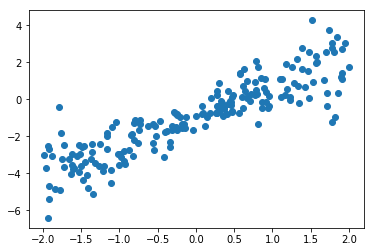

In [27]:
## 랜덤한 회귀용 예제 데이터셋을 만듭니다

np.random.seed(0)

def make_random_data():
    x = np.random.uniform(low=-2, high=2, size=200)
    y = []
    for t in x:
        r = np.random.normal(loc=0.0, 
                             scale=(0.5 + t*t/3), 
                             size=None)
        y.append(r)
    return  x, 1.726*x -0.84 + np.array(y)


x, y = make_random_data() 

plt.plot(x, y, 'o')
plt.savefig('../../gen_images/14_03.png', dpi=300)
plt.show()

In [28]:
x_train, y_train = x[:150], y[:150]
x_test, y_test = x[150:], y[150:]

In [29]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(units=1, input_dim=1))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(optimizer='sgd', loss='mse')
history = model.fit(x_train, y_train, epochs=300, 
                    validation_split=0.3)

Train on 105 samples, validate on 45 samples
Epoch 1/300
105/105 [==============================] - 0s 2ms/sample - loss: 5.4482 - val_loss: 3.6176
Epoch 2/300
105/105 [==============================] - 0s 79us/sample - loss: 5.3515 - val_loss: 3.5602
Epoch 3/300
105/105 [==============================] - 0s 73us/sample - loss: 5.2545 - val_loss: 3.5019
Epoch 4/300
105/105 [==============================] - 0s 69us/sample - loss: 5.1556 - val_loss: 3.4452
Epoch 5/300
105/105 [==============================] - 0s 69us/sample - loss: 5.0609 - val_loss: 3.3917
Epoch 6/300
105/105 [==============================] - 0s 72us/sample - loss: 4.9690 - val_loss: 3.3424
Epoch 7/300
105/105 [==============================] - 0s 73us/sample - loss: 4.8856 - val_loss: 3.2926
Epoch 8/300
105/105 [==============================] - 0s 66us/sample - loss: 4.8000 - val_loss: 3.2411
Epoch 9/300
105/105 [==============================] - 0s 66us/sample - loss: 4.7137 - val_loss: 3.1935
Epoch 10/300
105/105

105/105 [==============================] - 0s 67us/sample - loss: 1.6820 - val_loss: 1.4425
Epoch 79/300
105/105 [==============================] - 0s 79us/sample - loss: 1.6609 - val_loss: 1.4315
Epoch 80/300
105/105 [==============================] - 0s 76us/sample - loss: 1.6421 - val_loss: 1.4202
Epoch 81/300
105/105 [==============================] - 0s 63us/sample - loss: 1.6231 - val_loss: 1.4097
Epoch 82/300
105/105 [==============================] - 0s 69us/sample - loss: 1.6055 - val_loss: 1.3996
Epoch 83/300
105/105 [==============================] - 0s 68us/sample - loss: 1.5882 - val_loss: 1.3892
Epoch 84/300
105/105 [==============================] - 0s 85us/sample - loss: 1.5711 - val_loss: 1.3804
Epoch 85/300
105/105 [==============================] - 0s 81us/sample - loss: 1.5557 - val_loss: 1.3689
Epoch 86/300
105/105 [==============================] - 0s 62us/sample - loss: 1.5369 - val_loss: 1.3590
Epoch 87/300
105/105 [==============================] - 0s 71us/samp

105/105 [==============================] - 0s 59us/sample - loss: 0.9357 - val_loss: 1.0033
Epoch 156/300
105/105 [==============================] - 0s 69us/sample - loss: 0.9323 - val_loss: 1.0014
Epoch 157/300
105/105 [==============================] - 0s 78us/sample - loss: 0.9292 - val_loss: 0.9991
Epoch 158/300
105/105 [==============================] - 0s 61us/sample - loss: 0.9252 - val_loss: 0.9969
Epoch 159/300
105/105 [==============================] - 0s 69us/sample - loss: 0.9216 - val_loss: 0.9946
Epoch 160/300
105/105 [==============================] - 0s 59us/sample - loss: 0.9179 - val_loss: 0.9920
Epoch 161/300
105/105 [==============================] - 0s 61us/sample - loss: 0.9143 - val_loss: 0.9902
Epoch 162/300
105/105 [==============================] - 0s 71us/sample - loss: 0.9109 - val_loss: 0.9882
Epoch 163/300
105/105 [==============================] - 0s 61us/sample - loss: 0.9071 - val_loss: 0.9854
Epoch 164/300
105/105 [==============================] - 0s 

105/105 [==============================] - 0s 67us/sample - loss: 0.7921 - val_loss: 0.9145
Epoch 233/300
105/105 [==============================] - 0s 65us/sample - loss: 0.7916 - val_loss: 0.9140
Epoch 234/300
105/105 [==============================] - 0s 66us/sample - loss: 0.7911 - val_loss: 0.9143
Epoch 235/300
105/105 [==============================] - 0s 75us/sample - loss: 0.7905 - val_loss: 0.9137
Epoch 236/300
105/105 [==============================] - 0s 62us/sample - loss: 0.7897 - val_loss: 0.9132
Epoch 237/300
105/105 [==============================] - 0s 67us/sample - loss: 0.7890 - val_loss: 0.9129
Epoch 238/300
105/105 [==============================] - 0s 74us/sample - loss: 0.7885 - val_loss: 0.9129
Epoch 239/300
105/105 [==============================] - 0s 67us/sample - loss: 0.7879 - val_loss: 0.9128
Epoch 240/300
105/105 [==============================] - 0s 83us/sample - loss: 0.7874 - val_loss: 0.9124
Epoch 241/300
105/105 [==============================] - 0s 

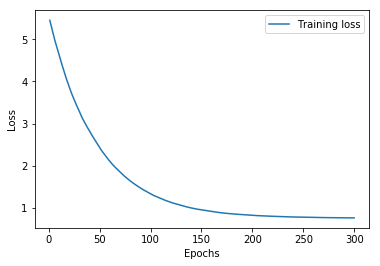

In [32]:
epochs = np.arange(1, 300+1)
plt.plot(epochs, history.history['loss'], label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('../../gen_images/14_04.png', dpi=300)
plt.show()

### 함수형 API

In [33]:
input = tf.keras.Input(shape=(1,))
output = tf.keras.layers.Dense(1)(input)

model = tf.keras.Model(input, output)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(optimizer='sgd', loss='mse')
history = model.fit(x_train, y_train, epochs=300, 
                    validation_split=0.3)

Train on 105 samples, validate on 45 samples
Epoch 1/300
105/105 [==============================] - 0s 985us/sample - loss: 8.4049 - val_loss: 5.6238
Epoch 2/300
105/105 [==============================] - 0s 69us/sample - loss: 8.2453 - val_loss: 5.5309
Epoch 3/300
105/105 [==============================] - 0s 79us/sample - loss: 8.0917 - val_loss: 5.4322
Epoch 4/300
105/105 [==============================] - 0s 67us/sample - loss: 7.9301 - val_loss: 5.3299
Epoch 5/300
105/105 [==============================] - 0s 75us/sample - loss: 7.7635 - val_loss: 5.2355
Epoch 6/300
105/105 [==============================] - 0s 70us/sample - loss: 7.6117 - val_loss: 5.1511
Epoch 7/300
105/105 [==============================] - 0s 69us/sample - loss: 7.4740 - val_loss: 5.0599
Epoch 8/300
105/105 [==============================] - 0s 63us/sample - loss: 7.3236 - val_loss: 4.9729
Epoch 9/300
105/105 [==============================] - 0s 64us/sample - loss: 7.1860 - val_loss: 4.8837
Epoch 10/300
105/1

105/105 [==============================] - 0s 66us/sample - loss: 2.1938 - val_loss: 1.8347
Epoch 79/300
105/105 [==============================] - 0s 83us/sample - loss: 2.1632 - val_loss: 1.8137
Epoch 80/300
105/105 [==============================] - 0s 72us/sample - loss: 2.1303 - val_loss: 1.7956
Epoch 81/300
105/105 [==============================] - 0s 70us/sample - loss: 2.1000 - val_loss: 1.7759
Epoch 82/300
105/105 [==============================] - 0s 68us/sample - loss: 2.0701 - val_loss: 1.7600
Epoch 83/300
105/105 [==============================] - 0s 67us/sample - loss: 2.0448 - val_loss: 1.7435
Epoch 84/300
105/105 [==============================] - 0s 73us/sample - loss: 2.0188 - val_loss: 1.7274
Epoch 85/300
105/105 [==============================] - 0s 75us/sample - loss: 1.9931 - val_loss: 1.7100
Epoch 86/300
105/105 [==============================] - 0s 70us/sample - loss: 1.9641 - val_loss: 1.6921
Epoch 87/300
105/105 [==============================] - 0s 72us/samp

105/105 [==============================] - 0s 68us/sample - loss: 1.0263 - val_loss: 1.0981
Epoch 156/300
105/105 [==============================] - 0s 70us/sample - loss: 1.0211 - val_loss: 1.0955
Epoch 157/300
105/105 [==============================] - 0s 66us/sample - loss: 1.0166 - val_loss: 1.0924
Epoch 158/300
105/105 [==============================] - 0s 75us/sample - loss: 1.0118 - val_loss: 1.0885
Epoch 159/300
105/105 [==============================] - 0s 67us/sample - loss: 1.0059 - val_loss: 1.0847
Epoch 160/300
105/105 [==============================] - 0s 65us/sample - loss: 1.0001 - val_loss: 1.0814
Epoch 161/300
105/105 [==============================] - 0s 67us/sample - loss: 0.9952 - val_loss: 1.0777
Epoch 162/300
105/105 [==============================] - 0s 60us/sample - loss: 0.9899 - val_loss: 1.0738
Epoch 163/300
105/105 [==============================] - 0s 65us/sample - loss: 0.9847 - val_loss: 1.0703
Epoch 164/300
105/105 [==============================] - 0s 

105/105 [==============================] - 0s 66us/sample - loss: 0.8069 - val_loss: 0.9463
Epoch 233/300
105/105 [==============================] - 0s 68us/sample - loss: 0.8057 - val_loss: 0.9456
Epoch 234/300
105/105 [==============================] - 0s 71us/sample - loss: 0.8048 - val_loss: 0.9440
Epoch 235/300
105/105 [==============================] - 0s 61us/sample - loss: 0.8032 - val_loss: 0.9435
Epoch 236/300
105/105 [==============================] - 0s 60us/sample - loss: 0.8025 - val_loss: 0.9426
Epoch 237/300
105/105 [==============================] - 0s 70us/sample - loss: 0.8014 - val_loss: 0.9428
Epoch 238/300
105/105 [==============================] - 0s 65us/sample - loss: 0.8010 - val_loss: 0.9420
Epoch 239/300
105/105 [==============================] - 0s 72us/sample - loss: 0.8002 - val_loss: 0.9415
Epoch 240/300
105/105 [==============================] - 0s 75us/sample - loss: 0.7995 - val_loss: 0.9408
Epoch 241/300
105/105 [==============================] - 0s 

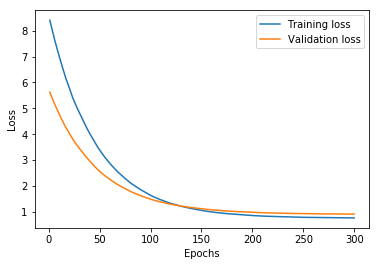

In [35]:
plt.plot(epochs, history.history['loss'], label='Training loss')
plt.plot(epochs, history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('../../gen_images/14_05.png', dpi=300)
plt.show()

## tf.keras 모델의 저장과 복원

In [36]:
model.save_weights('simple_weights.h5')

In [37]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_dim=1))
model.compile(optimizer='sgd', loss='mse')

model.load_weights('simple_weights.h5')

In [38]:
model.evaluate(x_test, y_test)

50/50 [==============================] - 0s 632us/sample - loss: 0.9506


0.9506389927864075

In [39]:
model.save('simple_model.h5')

In [40]:
model = tf.keras.models.load_model('simple_model.h5')
model.evaluate(x_test, y_test)

50/50 [==============================] - 0s 623us/sample - loss: 0.9506


0.9506389927864075

In [41]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_dim=1))
model.compile(optimizer='sgd', loss='mse')

callback_list = [tf.keras.callbacks.ModelCheckpoint(filepath='my_model.h5', 
                                 monitor='val_loss', save_best_only=True),
                 tf.keras.callbacks.EarlyStopping(patience=5)]
history = model.fit(x_train, y_train, epochs=300, 
                    validation_split=0.2, callbacks=callback_list)

Train on 120 samples, validate on 30 samples
Epoch 1/300
120/120 [==============================] - 0s 887us/sample - loss: 6.6965 - val_loss: 3.9370
Epoch 2/300
120/120 [==============================] - 0s 91us/sample - loss: 6.5793 - val_loss: 3.8651
Epoch 3/300
120/120 [==============================] - 0s 91us/sample - loss: 6.4625 - val_loss: 3.7929
Epoch 4/300
120/120 [==============================] - 0s 87us/sample - loss: 6.3467 - val_loss: 3.7243
Epoch 5/300
120/120 [==============================] - 0s 86us/sample - loss: 6.2352 - val_loss: 3.6576
Epoch 6/300
120/120 [==============================] - 0s 87us/sample - loss: 6.1273 - val_loss: 3.5920
Epoch 7/300
120/120 [==============================] - 0s 82us/sample - loss: 6.0204 - val_loss: 3.5277
Epoch 8/300
120/120 [==============================] - 0s 90us/sample - loss: 5.9155 - val_loss: 3.4640
Epoch 9/300
120/120 [==============================] - 0s 82us/sample - loss: 5.8129 - val_loss: 3.4025
Epoch 10/300
120/1

120/120 [==============================] - 0s 91us/sample - loss: 2.0430 - val_loss: 1.2527
Epoch 79/300
120/120 [==============================] - 0s 95us/sample - loss: 2.0183 - val_loss: 1.2404
Epoch 80/300
120/120 [==============================] - 0s 92us/sample - loss: 1.9940 - val_loss: 1.2281
Epoch 81/300
120/120 [==============================] - 0s 98us/sample - loss: 1.9706 - val_loss: 1.2160
Epoch 82/300
120/120 [==============================] - 0s 93us/sample - loss: 1.9470 - val_loss: 1.2039
Epoch 83/300
120/120 [==============================] - 0s 81us/sample - loss: 1.9235 - val_loss: 1.1924
Epoch 84/300
120/120 [==============================] - 0s 96us/sample - loss: 1.9010 - val_loss: 1.1812
Epoch 85/300
120/120 [==============================] - 0s 87us/sample - loss: 1.8790 - val_loss: 1.1701
Epoch 86/300
120/120 [==============================] - 0s 89us/sample - loss: 1.8572 - val_loss: 1.1594
Epoch 87/300
120/120 [==============================] - 0s 93us/samp

120/120 [==============================] - 0s 91us/sample - loss: 1.0592 - val_loss: 0.8150
Epoch 156/300
120/120 [==============================] - 0s 87us/sample - loss: 1.0538 - val_loss: 0.8135
Epoch 157/300
120/120 [==============================] - 0s 86us/sample - loss: 1.0487 - val_loss: 0.8119
Epoch 158/300
120/120 [==============================] - 0s 91us/sample - loss: 1.0438 - val_loss: 0.8103
Epoch 159/300
120/120 [==============================] - 0s 94us/sample - loss: 1.0387 - val_loss: 0.8088
Epoch 160/300
120/120 [==============================] - 0s 86us/sample - loss: 1.0334 - val_loss: 0.8074
Epoch 161/300
120/120 [==============================] - 0s 80us/sample - loss: 1.0287 - val_loss: 0.8061
Epoch 162/300
120/120 [==============================] - 0s 95us/sample - loss: 1.0241 - val_loss: 0.8048
Epoch 163/300
120/120 [==============================] - 0s 88us/sample - loss: 1.0196 - val_loss: 0.8035
Epoch 164/300
120/120 [==============================] - 0s 

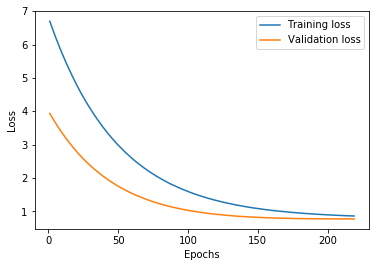

In [42]:
epochs = np.arange(1, len(history.history['loss'])+1)
plt.plot(epochs, history.history['loss'], label='Training loss')
plt.plot(epochs, history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('../../gen_images/14_05.png', dpi=300)
plt.show()

저장된 모델 복원:

In [43]:
model = tf.keras.models.load_model('simple_model.h5')
model.load_weights('my_model.h5')
model.evaluate(x_test, y_test)

50/50 [==============================] - 0s 635us/sample - loss: 1.0019


1.0019198226928712

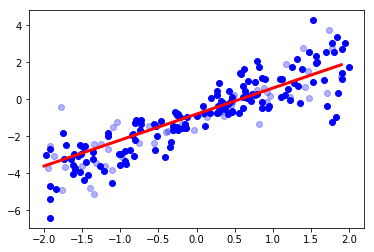

In [44]:
x_arr = np.arange(-2, 2, 0.1)
y_arr = model.predict(x_arr)

plt.figure()
plt.plot(x_train, y_train, 'bo')
plt.plot(x_test, y_test, 'bo', alpha=0.3)
plt.plot(x_arr, y_arr, '-r', lw=3)
plt.savefig('../../gen_images/14_08.png', dpi=400)
plt.show()

## 계산 그래프 시각화하기

In [45]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_dim=1))

In [46]:
callback_list = [tf.keras.callbacks.TensorBoard(log_dir='logs')]
model.compile(optimizer='sgd', loss='mse')
history = model.fit(x_train, y_train, epochs=300, 
                    callbacks=callback_list, validation_split=0.3)

Train on 105 samples, validate on 45 samples
Epoch 1/300
105/105 [==============================] - 0s 1ms/sample - loss: 1.8150 - val_loss: 1.4673
Epoch 2/300
105/105 [==============================] - 0s 81us/sample - loss: 1.7974 - val_loss: 1.4559
Epoch 3/300
105/105 [==============================] - 0s 76us/sample - loss: 1.7798 - val_loss: 1.4443
Epoch 4/300
105/105 [==============================] - 0s 72us/sample - loss: 1.7615 - val_loss: 1.4336
Epoch 5/300
105/105 [==============================] - 0s 72us/sample - loss: 1.7447 - val_loss: 1.4227
Epoch 6/300
105/105 [==============================] - 0s 68us/sample - loss: 1.7281 - val_loss: 1.4124
Epoch 7/300
105/105 [==============================] - 0s 75us/sample - loss: 1.7124 - val_loss: 1.4028
Epoch 8/300
105/105 [==============================] - 0s 75us/sample - loss: 1.6970 - val_loss: 1.3925
Epoch 9/300
105/105 [==============================] - 0s 79us/sample - loss: 1.6807 - val_loss: 1.3830
Epoch 10/300
105/105

105/105 [==============================] - 0s 68us/sample - loss: 1.0416 - val_loss: 0.9897
Epoch 79/300
105/105 [==============================] - 0s 69us/sample - loss: 1.0358 - val_loss: 0.9864
Epoch 80/300
105/105 [==============================] - 0s 66us/sample - loss: 1.0303 - val_loss: 0.9831
Epoch 81/300
105/105 [==============================] - 0s 69us/sample - loss: 1.0246 - val_loss: 0.9807
Epoch 82/300
105/105 [==============================] - 0s 78us/sample - loss: 1.0203 - val_loss: 0.9779
Epoch 83/300
105/105 [==============================] - 0s 78us/sample - loss: 1.0153 - val_loss: 0.9752
Epoch 84/300
105/105 [==============================] - 0s 78us/sample - loss: 1.0108 - val_loss: 0.9725
Epoch 85/300
105/105 [==============================] - 0s 76us/sample - loss: 1.0059 - val_loss: 0.9698
Epoch 86/300
105/105 [==============================] - 0s 71us/sample - loss: 1.0015 - val_loss: 0.9675
Epoch 87/300
105/105 [==============================] - 0s 81us/samp

105/105 [==============================] - 0s 72us/sample - loss: 0.8339 - val_loss: 0.8858
Epoch 156/300
105/105 [==============================] - 0s 70us/sample - loss: 0.8326 - val_loss: 0.8854
Epoch 157/300
105/105 [==============================] - 0s 67us/sample - loss: 0.8312 - val_loss: 0.8849
Epoch 158/300
105/105 [==============================] - 0s 72us/sample - loss: 0.8299 - val_loss: 0.8845
Epoch 159/300
105/105 [==============================] - 0s 65us/sample - loss: 0.8289 - val_loss: 0.8841
Epoch 160/300
105/105 [==============================] - 0s 81us/sample - loss: 0.8278 - val_loss: 0.8839
Epoch 161/300
105/105 [==============================] - 0s 80us/sample - loss: 0.8271 - val_loss: 0.8835
Epoch 162/300
105/105 [==============================] - 0s 83us/sample - loss: 0.8260 - val_loss: 0.8830
Epoch 163/300
105/105 [==============================] - 0s 88us/sample - loss: 0.8248 - val_loss: 0.8825
Epoch 164/300
105/105 [==============================] - 0s 

105/105 [==============================] - 0s 72us/sample - loss: 0.7781 - val_loss: 0.8752
Epoch 233/300
105/105 [==============================] - 0s 73us/sample - loss: 0.7777 - val_loss: 0.8752
Epoch 234/300
105/105 [==============================] - 0s 65us/sample - loss: 0.7772 - val_loss: 0.8750
Epoch 235/300
105/105 [==============================] - 0s 75us/sample - loss: 0.7771 - val_loss: 0.8749
Epoch 236/300
105/105 [==============================] - 0s 78us/sample - loss: 0.7767 - val_loss: 0.8747
Epoch 237/300
105/105 [==============================] - 0s 76us/sample - loss: 0.7761 - val_loss: 0.8750
Epoch 238/300
105/105 [==============================] - 0s 78us/sample - loss: 0.7756 - val_loss: 0.8751
Epoch 239/300
105/105 [==============================] - 0s 81us/sample - loss: 0.7755 - val_loss: 0.8751
Epoch 240/300
105/105 [==============================] - 0s 67us/sample - loss: 0.7751 - val_loss: 0.8751
Epoch 241/300
105/105 [==============================] - 0s 

In [47]:
input = tf.keras.Input(shape=(784,))
hidden = tf.keras.layers.Dense(100)(input)
output = tf.keras.layers.Dense(10)(hidden)

model = tf.keras.Model(input, output)

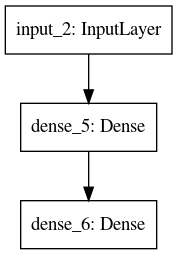

In [48]:
tf.keras.utils.plot_model(model, to_file='model_1.png')

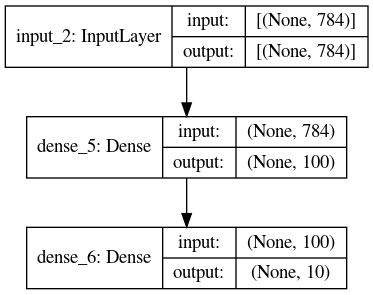

In [49]:
tf.keras.utils.plot_model(model, show_shapes=True, to_file='model_2.png')